In [1]:
import numpy as np
# np.random.seed(129803)

import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/lsimek/matplotlibrc/main/navy.mplstyle')

import seaborn as sns

import scipy.stats as stats
import scipy.linalg as linalg
from scipy.spatial import ConvexHull

import os
import sys

In [2]:
def chull_plot(ax, vertices, hull, colorid='2', lw=1.5, style='--', **kwargs):
    hv = hull.vertices
    hv = np.hstack((hv, hv[0]))
    
    ax.plot(vertices[hv,0], vertices[hv,1], linestyle=style, lw=lw, color=f'C{colorid}', **kwargs)

In [3]:
def chull_area(vertices, hull):
    x = vertices[hull.vertices, 0]
    y = vertices[hull.vertices, 1]

    yl = np.roll(y, shift=-1, axis=0)
    yr = np.roll(y, shift=1, axis=0)

    return 1/2 * ( np.sum(x*yl) - np.sum(x*yr) )

In [4]:
def get_walk(n=100, drift_vec=np.array([0,0]), sigma=1):
    w  = np.random.normal(size=(n-1,2))
    w = np.vstack((np.array([0,0]),w))

    drift = np.tile(drift_vec,n).reshape(n,2)

    return w.cumsum(axis=0) + ( drift.cumsum(axis=0) - drift_vec )

In [5]:
def plot_walk(ax, w):
    ax.plot(w[:, 0], w[:, 1])

## trying it out

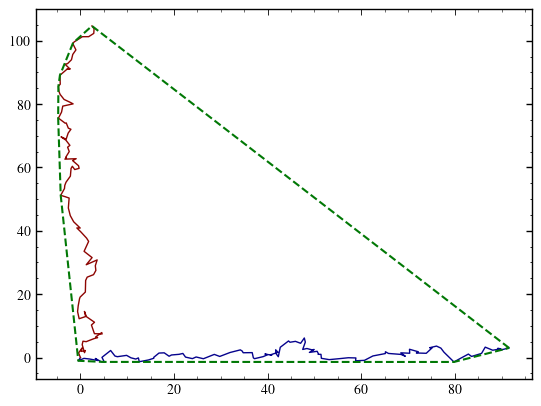

In [15]:
fig, ax = plt.subplots()

n = 100
w1 = get_walk(n, np.array([1,0]), sigma=2)
w2 = get_walk(n, np.array([0,1]), sigma=3)

ax.plot(w1[:,0],w1[:,1])
ax.plot(w2[:,0],w2[:,1])

allw = np.vstack((w1,w2))
hull = ConvexHull(allw)
chull_plot(ax, allw, hull)

## calculate area of hull?

In [7]:
n = 1000
nsim = 4500
areas = []

for _ in range(nsim):
    w1 = get_walk(n, np.array([1,0]), sigma=1)
    w2 = get_walk(n, np.array([0,1]), sigma=1)
    
    allw = np.vstack((w1,w2))
    hull = ConvexHull(allw)

    areas.append(chull_area(allw, hull))

In [8]:
a = np.array(areas)
a1 = (a - n**2/2) / n**1.5

### normality?

In [9]:
np.mean(a1), np.std(a1)

(np.float64(0.7653930474924491), np.float64(0.7766996763846356))

In [10]:
stats.shapiro(a1)

ShapiroResult(statistic=np.float64(0.9989866338953365), pvalue=np.float64(0.008295205496596115))

## growth?

In [11]:
ns = np.arange(5000, 10000, 500)

nsim = 500
areas = {n:[] for n in ns}

for n in ns:
    for _ in range(nsim):
        w1 = get_walk(n, np.array([1,0]), sigma=1)
        w2 = get_walk(n, np.array([0,1]), sigma=1)
        
        allw = np.vstack((w1,w2))
        hull = ConvexHull(allw)
    
        areas[n].append(chull_area(allw, hull))

In [12]:
avgs = {n: sum(areas[n])/nsim for n in ns }

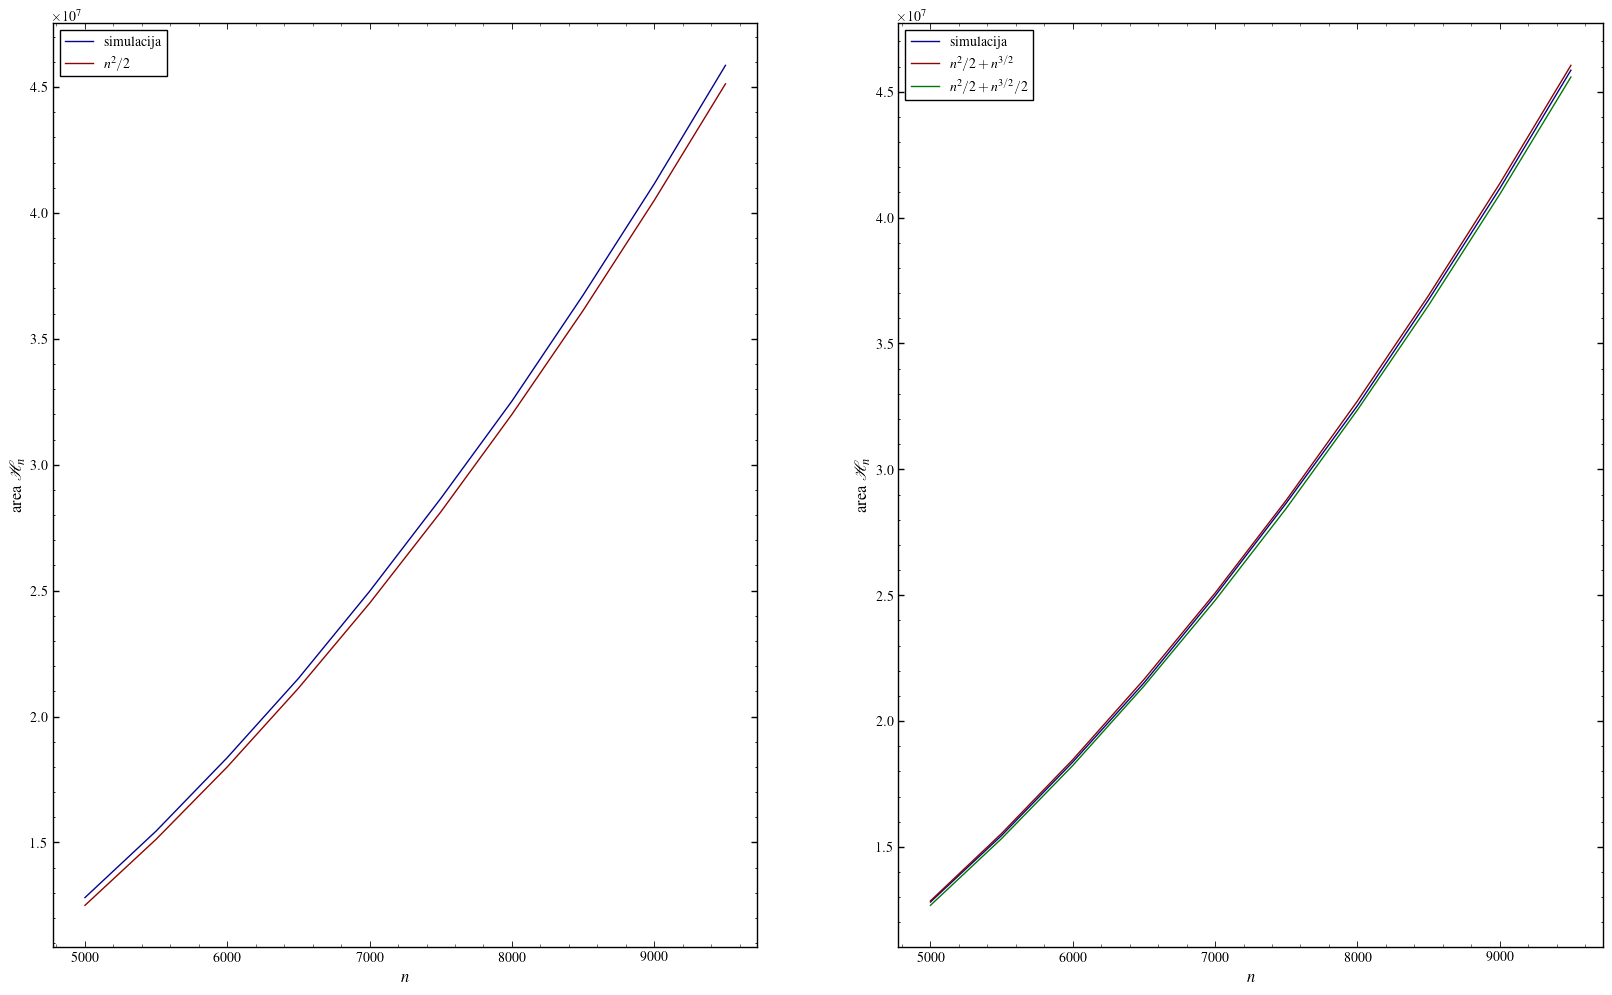

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,12))
sns.lineplot(x=ns, y=avgs.values(), ax=ax1, label='simulacija')
sns.lineplot(x=ns, y=ns**2/2, ax=ax1, label=r'$n^2/2$')

sns.lineplot(x=ns, y=avgs.values(), ax=ax2, label='simulacija')
sns.lineplot(x=ns, y=ns**2/2+ns**1.5, ax=ax2, label=r'$n^2/2+n^{3/2}$')
sns.lineplot(x=ns, y=ns**2/2+ns**1.5/2, ax=ax2, label=r'$n^2/2+n^{3/2}/2$')

ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'area $\mathcal H_n$')
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'area $\mathcal H_n$')

plt.savefig('../images/2setnje_rast.png')

## $m_n$ and $M_n$ (extremal points with respect to line from $0$ to $S_n$)

In [129]:
n=500
w = get_walk(n=n, drift_vec=np.array([1,0]))

Sn = w[n-1:].flatten()
e = np.array([ -Sn[1], Sn[0] ]) / np.linalg.norm(Sn) # -> \mu^perp g.s.

In [130]:
proj = np.dot(w, e)
midx = np.argmin(proj)
Midx = np.argmax(proj)

tripl = w[[0, midx, n-1, 0]]
tripu = w[[0, Midx, n-1, 0]]

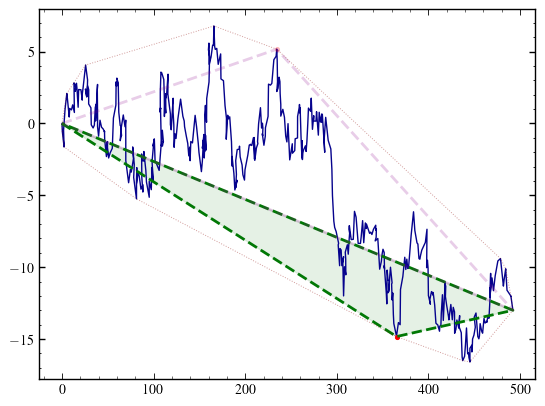

In [137]:
fig, ax = plt.subplots()
plot_walk(ax, w)

ax.plot(w[midx, 0], w[midx, 1], 'ro')
ax.plot(tripl[:, 0], tripl[:, 1], linestyle='--', lw=2, color=f'C2', alpha=1)
ax.fill(tripl[:, 0], tripl[:, 1], color='C2', alpha=0.1)

ax.plot(w[Midx, 0], w[Midx, 1], 'ro', alpha=0.2)
ax.plot(tripu[:, 0], tripu[:, 1], linestyle='--', lw=2, color=f'C4', alpha=0.2)

chull_plot(ax, w, ConvexHull(w), colorid='1', lw=0.7, style=':', alpha=0.4)
